In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import math
from sklearn.preprocessing import normalize
import networkx as nx

In [ ]:
def math_dist(p,q):
  return math.sqrt(sum((px - qx) ** 2.0 for px, qx in zip(p, q)))

In [ ]:
df_data = pd.read_csv('/content/drive/MyDrive/Colab_Data/context_Bert_embeddings.csv')
df_data = df_data.iloc[: , 1:]

In [ ]:
df_data.head()

,0,1,2,3,4,5,6,7,8,9,...,760,761,762,763,764,765,766,767,President,Context
0,-0.451562,0.426158,0.219816,-0.849718,0.281534,0.616315,0.737683,0.949295,-0.751766,-0.324895,...,0.862819,0.687220,-0.158071,-0.515992,0.131474,0.103940,0.119401,0.587358,George Washington,Inaugural
1,0.148645,0.417802,0.260301,-0.157755,0.703107,-0.139461,0.959897,1.703524,-0.110015,0.492383,...,0.696151,-0.196855,-0.127989,-0.859045,0.890896,0.252092,0.317357,0.079760,George Washington,NaN
2,0.135522,0.501134,0.182142,-0.306708,0.384374,0.175770,0.938393,1.707870,-0.877020,0.050283,...,1.119001,0.638456,-0.012950,-0.382356,-0.209111,0.230742,-0.261033,0.473495,George Washington,Congress
3,-0.018716,0.509902,0.142588,-0.342451,0.443129,0.449074,0.601397,1.513130,-0.406376,-0.062696,...,0.919529,0.884244,-0.258118,-0.329690,0.149616,0.158378,-0.203394,0.526076,George Washington,Congress
4,-0.528598,0.817750,-0.300293,0.094070,-0.221678,0.630310,0.830652,1.221837,-1.133771,0.211068,...,0.425855,-0.282351,0.056721,-0.257504,0.786482,0.010725,0.248509,0.018024,George Washington,Native


In [ ]:
df_data.iloc[:,0:767]

,0,1,2,3,4,5,6,7,8,9,...,757,758,759,760,761,762,763,764,765,766
0,-0.451562,0.426158,0.219816,-0.849718,0.281534,0.616315,0.737683,0.949295,-0.751766,-0.324895,...,-0.744241,0.047439,-0.555630,0.862819,0.687220,-0.158071,-0.515992,0.131474,0.103940,0.119401
1,0.148645,0.417802,0.260301,-0.157755,0.703107,-0.139461,0.959897,1.703524,-0.110015,0.492383,...,-0.403515,0.336861,-0.254485,0.696151,-0.196855,-0.127989,-0.859045,0.890896,0.252092,0.317357
2,0.135522,0.501134,0.182142,-0.306708,0.384374,0.175770,0.938393,1.707870,-0.877020,0.050283,...,-0.446950,0.001826,-0.258804,1.119001,0.638456,-0.012950,-0.382356,-0.209111,0.230742,-0.261033
3,-0.018716,0.509902,0.142588,-0.342451,0.443129,0.449074,0.601397,1.513130,-0.406376,-0.062696,...,-0.564978,-0.237280,-0.325017,0.919529,0.884244,-0.258118,-0.329690,0.149616,0.158378,-0.203394
4,-0.528598,0.817750,-0.300293,0.094070,-0.221678,0.630310,0.830652,1.221837,-1.133771,0.211068,...,-0.432905,0.680700,0.285704,0.425855,-0.282351,0.056721,-0.257504,0.786482,0.010725,0.248509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,0.295844,0.104912,0.800402,0.880845,-0.257410,0.334540,-0.040896,0.453667,-0.237029,-0.783942,...,-0.524827,-0.915303,0.338069,0.678325,-1.740401,0.645356,-1.794647,0.773655,0.960931,0.411943
988,0.296089,0.307767,1.603052,0.729244,0.610043,0.186143,-0.023952,0.588116,-0.538455,-1.140826,...,-0.138031,-0.708810,0.706618,0.319435,-0.899022,0.791725,-1.112495,0.898752,0.108311,0.444255
989,0.440179,0.305012,0.568986,0.770342,0.040137,-0.238913,-0.897154,0.189775,0.377903,-1.003946,...,-0.275440,0.096567,-0.613432,0.913523,-1.578880,0.214537,-0.886005,0.260713,0.285068,0.857506
990,0.029353,0.596342,1.440916,0.320703,0.032570,0.493670,-0.004260,1.611372,-0.590095,-1.186555,...,-0.374811,0.228583,0.454049,0.511020,-0.873197,0.467838,-1.180761,-0.063033,0.262972,0.585867


In [ ]:
def ward_dist(cluster_a, cluster_b):
    if len(cluster_b) != 0:
        all_ps = np.concatenate((cluster_a, cluster_b))
        center_all = [np.mean(all_ps[:,i]) for i in range(all_ps.shape[1])]
        comp1 = sum([math_dist(p, center_all)**2 for p in all_ps])
        center_a = [np.mean(cluster_a[:,i]) for i in range(cluster_a.shape[1])]
        comp2 = sum([math_dist(p, center_a)**2 for p in cluster_a])
        center_b = [np.mean(cluster_b[:,i]) for i in range(cluster_b.shape[1])]
        comp3 = sum([math_dist(p, center_b)**2 for p in cluster_b])
        return comp1 - comp2 - comp3
    else:
        center_a = [np.mean(cluster_a[:,i]) for i in range(cluster_a.shape[1])]
        comp2 = sum([math_dist(p, center_a)**2 for p in cluster_a])
        return comp2

In [ ]:
focal_presidents = []
for president_name in df_data['President'].unique():
    x_index = df_data[df_data.President == president_name].index.values
    if len(x_index) > 20:
        focal_presidents.append(president_name)

In [ ]:
focal_topics = []
for context_name in df_data['Context'].unique():
    x_index = df_data[df_data.Context == context_name].index.values
    if len(x_index) > 20:
        focal_topics.append(context_name)

In [ ]:
# instead of using tsne, I will use PCA to reduce the cost of dimension reduction
pca = PCA(n_components=100)
pca.fit(df_data.iloc[:,0:767])
print(f"Explained Variance: {sum(pca.explained_variance_ratio_)}")
pcaSpace = pca.transform(df_data.iloc[:,0:767])

Explained Variance: 0.9246998631820528


In [ ]:
available_audio_presidents = ['Donald Trump', 'Barack Obama', 'George W. Bush', 'Bill Clinton',
                              'George H. W. Bush', 'Ronald Reagan', 'Jimmy Carter', 'Gerald Ford',
                              'Richard M. Nixon', 'Lyndon B. Johnson', 'John F. Kennedy', 'Harry S. Truman',
                              'Franklin D. Roosevelt', 'Warren G. Harding']
focal_presidents = list(set(focal_presidents).intersection(set(available_audio_presidents)))

In [ ]:
focal_presidents

['John F. Kennedy',
 'Richard M. Nixon',
 'Jimmy Carter',
 'George W. Bush',
 'Barack Obama',
 'Lyndon B. Johnson',
 'Bill Clinton',
 'Ronald Reagan',
 'Franklin D. Roosevelt',
 'George H. W. Bush']

In [ ]:
innov_df = pd.DataFrame(columns=['Context', 'Name'] + focal_presidents)

for context in focal_topics:
    for president in focal_presidents:
        dict = {}
        dict['Context'] = context
        my_index = df_data[(df_data.President == president) & (df_data.Context == context)].index.values
        my_position = pcaSpace[my_index, :]
        dict['Name'] = president
        for president2 in focal_presidents:
            president2_index = df_data[(df_data.President == president2) & (df_data.Context == context)].index.values
            president2_position = pcaSpace[president2_index, :]
            dict[president2] = 1 / (1 + ward_dist(my_position, president2_position))
        org_sim = list(dict.values())[2:]
        try:
            rescaled_sim = [(i-min(org_sim)) / (max(org_sim)-min(org_sim)) for i in org_sim]
        except:
            rescaled_sim = [i for i in org_sim]
        for i, president2 in enumerate(focal_presidents):
            dict[president2] = rescaled_sim[i]
        innov_df = innov_df.append(dict, ignore_index=True)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:
congress_net

,John F. Kennedy,Richard M. Nixon,Jimmy Carter,George W. Bush,Barack Obama,Lyndon B. Johnson,Bill Clinton,Ronald Reagan,Franklin D. Roosevelt,George H. W. Bush
Name,,,,,,,,,,
John F. Kennedy,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000
Richard M. Nixon,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000
Jimmy Carter,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000
George W. Bush,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000
Barack Obama,0.142539,0.142539,0.142539,0.142539,0.142539,0.000000,0.001870,0.142539,0.142539,0.000356
Lyndon B. Johnson,0.142769,0.142769,0.142769,0.142769,0.000000,0.142769,0.000509,0.142769,0.142769,0.000104
Bill Clinton,0.142621,0.142621,0.142621,0.142621,0.001510,0.000144,0.142621,0.142621,0.142621,0.000000
Ronald Reagan,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000
Franklin D. Roosevelt,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000


In [ ]:
# Congress network
congress_net = innov_df[innov_df.Context == 'Congress'].iloc[:, 1:].set_index('Name')
# FP network
fp_net = innov_df[innov_df.Context == 'FP'].iloc[:, 1:].set_index('Name')
# War network
war_net = innov_df[innov_df.Context == 'War'].iloc[:, 1:].set_index('Name')
# Inaugural network
inaugural_net = innov_df[innov_df.Context == 'Inaugural'].iloc[:, 1:].set_index('Name')
# Money network
money_net = innov_df[innov_df.Context == 'Money'].iloc[:, 1:].set_index('Name')
# SOTU network
sotu_net = innov_df[innov_df.Context == 'SOTU'].iloc[:, 1:].set_index('Name')
# Veto network
veto_net = innov_df[innov_df.Context == 'Veto'].iloc[:, 1:].set_index('Name')
# Commemoration network
commemoration_net = innov_df[innov_df.Context == 'Commemoration'].iloc[:, 1:].set_index('Name')
# Convention network
convention_net = innov_df[innov_df.Context == 'Convention'].iloc[:, 1:].set_index('Name')
# Policy network
policy_net = innov_df[innov_df.Context == 'Policy'].iloc[:, 1:].set_index('Name')
# Press network
press_net = innov_df[innov_df.Context == 'Press'].iloc[:, 1:].set_index('Name')
# University network
university_net = innov_df[innov_df.Context == 'University'].iloc[:, 1:].set_index('Name')

In [ ]:
# write into file
congress_net.to_csv('/content/drive/MyDrive/Colab_Data/network_data_2/congress.csv')
fp_net.to_csv('/content/drive/MyDrive/Colab_Data/network_data_2/fp.csv')
war_net.to_csv('/content/drive/MyDrive/Colab_Data/network_data_2/war.csv')
inaugural_net.to_csv('/content/drive/MyDrive/Colab_Data/network_data_2/inaugural.csv')
money_net.to_csv('/content/drive/MyDrive/Colab_Data/network_data_2/money.csv')
sotu_net.to_csv('/content/drive/MyDrive/Colab_Data/network_data_2/sotu.csv')
veto_net.to_csv('/content/drive/MyDrive/Colab_Data/network_data_2/veto.csv')
commemoration_net.to_csv('/content/drive/MyDrive/Colab_Data/network_data_2/commemoration.csv')
policy_net.to_csv('/content/drive/MyDrive/Colab_Data/network_data_2/policy.csv')
press_net.to_csv('/content/drive/MyDrive/Colab_Data/network_data_2/press.csv')
university_net.to_csv('/content/drive/MyDrive/Colab_Data/network_data_2/university.csv')
convention_net.to_csv('/content/drive/MyDrive/Colab_Data/network_data_2/convention.csv')

In [ ]:
# transform adjancy matrix to graph object
def adj_to_graph(network, norm='l1'):
    X_normalized = normalize(network.values, norm=norm)
    network.iloc[:,:] = X_normalized
    G = nx.from_pandas_adjacency(congress_net, create_using=nx.DiGraph())
    return G

In [ ]:
congress_g = adj_to_graph(congress_net)

In [ ]:
# besides taking the distance between each president at each topic into consideration, we may need to take the variance of each president into consideration as well
self_var = pd.DataFrame(columns=['Name', 'Individual Fluctuation'])
for president in focal_presidents:
    dict = {}
    dict['Name'] = president
    my_index = df_data[(df_data.President == president)].index.values
    my_position = pcaSpace[my_index, :]
    center = my_position.mean(axis=0)
    mean_dist = np.mean([math_dist(center, pos) for pos in my_position])
    dict['Individual Fluctuation'] = mean_dist
    self_var = self_var.append(dict, ignore_index=True)

In [ ]:
ward_dist(my_position, president2_position)

2291.369988671323

# __DOC EMBEDDING FOR BERT__#




In [ ]:
# use gensim pre-trained word2vec model
import gensim.downloader as api
# I use fasttext-wiki-news-subwords-300 model
wv = api.load('fasttext-wiki-news-subwords-300')

In [ ]:
# fast text model
d2vmodel = Average(wv)
d2vmodel.train(IndexedList(texts))

(991, 1750964)

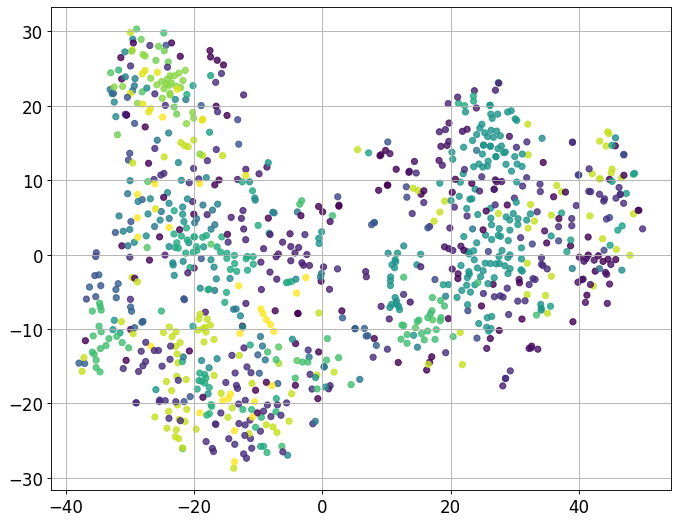

In [ ]:
# T-SNE
tsneDoc = sklearn.manifold.TSNE(n_components=2).fit_transform(d2vmodel.sv.vectors)
fig = plt.figure(figsize=(10, 8), dpi=80)
plt.scatter(tsneDoc[:, 0], tsneDoc[:, 1], c=labels, s=30, alpha=0.8, label=presidents_names)
# plt.legend()
plt.grid()
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

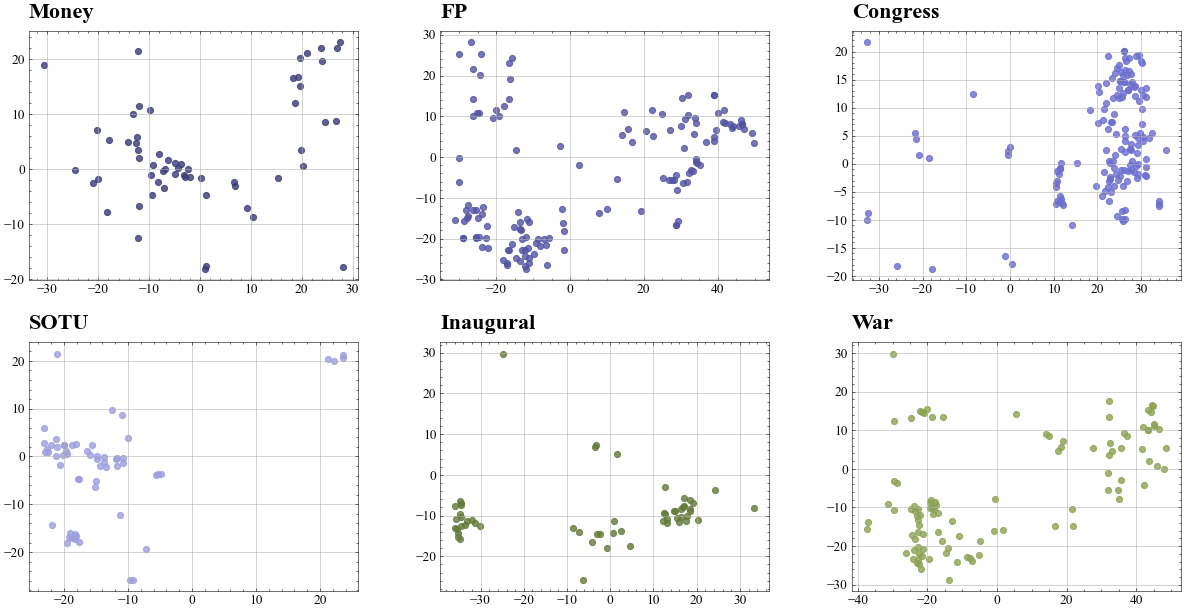

In [ ]:
# visualize the embedding
plt.style.use(['nature', 'science', 'no-latex'])
plt.rcParams['font.family'] = 'Times New Roman'
fig, axis = plt.subplots(2, 3, figsize=(16, 10), dpi=80)
# context_names = context_names[1:]
cmap = cm.get_cmap('tab20b')
colors = cmap.colors
i = 0
for context_name in context_names:
    x_index = speech[speech.Context == context_name].index.values
    if len(x_index) <= 50:
        continue
    axis[i//3, i%3].set_title(context_name, loc = 'left', fontsize=20, pad=12, fontweight ="bold")
    axis[i//3, i%3].scatter(tsneDoc[x_index, 0], tsneDoc[x_index, 1], color=colors[i], s=30, alpha=0.8, label=context_name)
    axis[i//3, i%3].tick_params(axis='both', which='major', labelsize=12)
    axis[i//3, i%3].grid()
    i += 1
    if i == 9:
        break
        
plt.subplots_adjust(left=0, bottom=0.1, right=0.9, top=0.8, wspace=0.25, hspace=0.25)
plt.show()

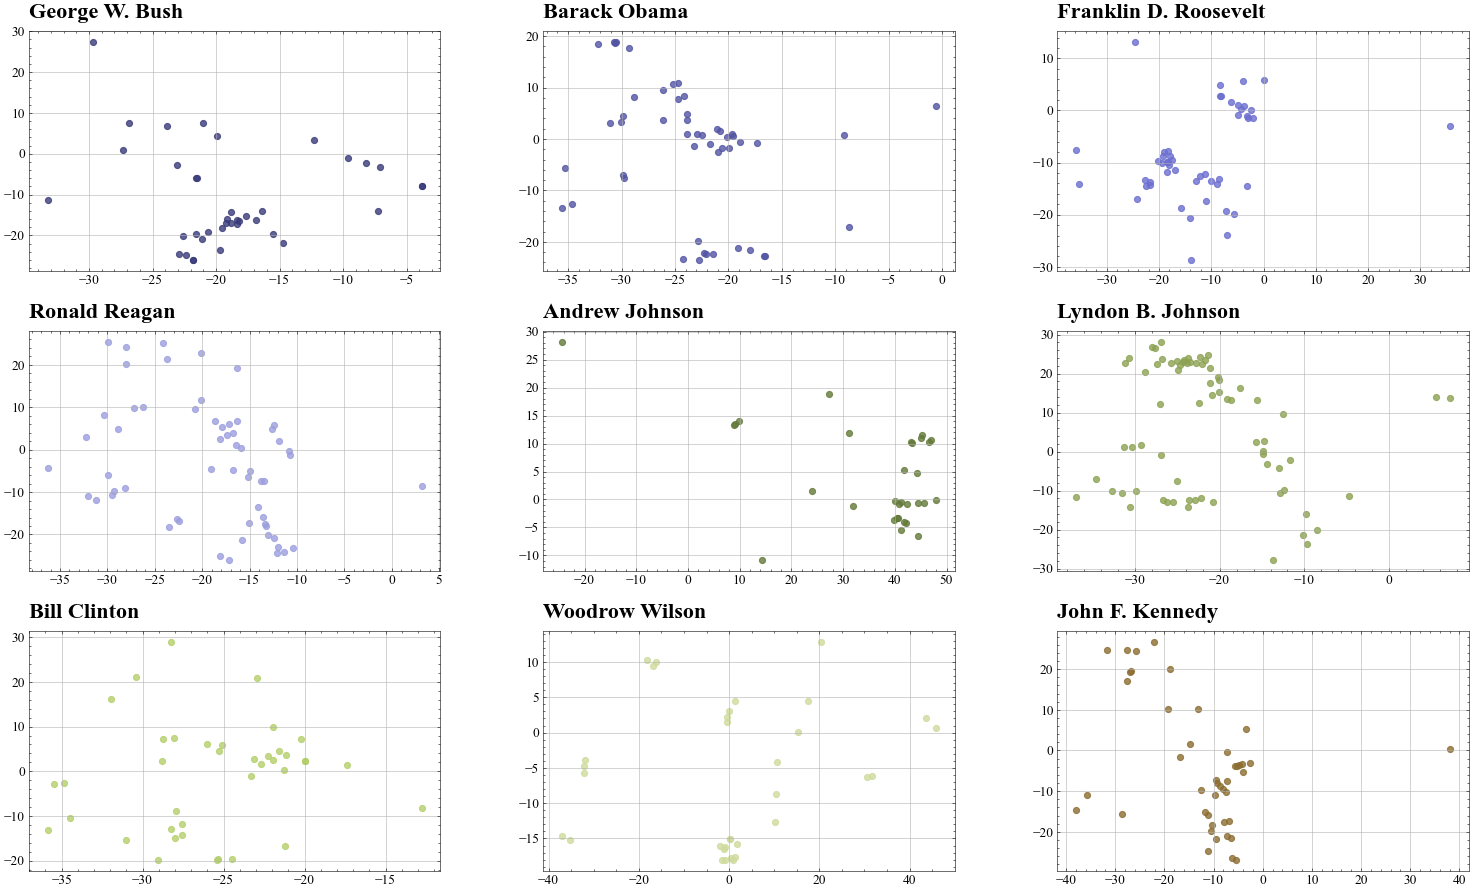

In [ ]:
# encode president names to numbers
presidents_names = list(set(speech.President.values))
labels = [presidents_names.index(name) for name in speech.President.values]
fig, axis = plt.subplots(3, 3, figsize=(20, 15), dpi=80)
cmap = cm.get_cmap('tab20b')
colors = cmap.colors
i = 0
for president_name in presidents_names:
    x_index = speech[speech.President == president_name].index.values
    if len(x_index) <= 30:
        continue
    axis[i//3, i%3].set_title(president_name, loc = 'left', fontsize=20, pad=12, fontweight ="bold")
    axis[i//3, i%3].scatter(tsneDoc[x_index, 0], tsneDoc[x_index, 1], color=colors[i], s=30, alpha=0.8, label=president_name)
    axis[i//3, i%3].tick_params(axis='both', which='major', labelsize=12)
    axis[i//3, i%3].grid()
    i += 1
    if i == 9:
        break
        
plt.subplots_adjust(left=0, bottom=0.1, right=0.9, top=0.8, wspace=0.25, hspace=0.25)
plt.show()

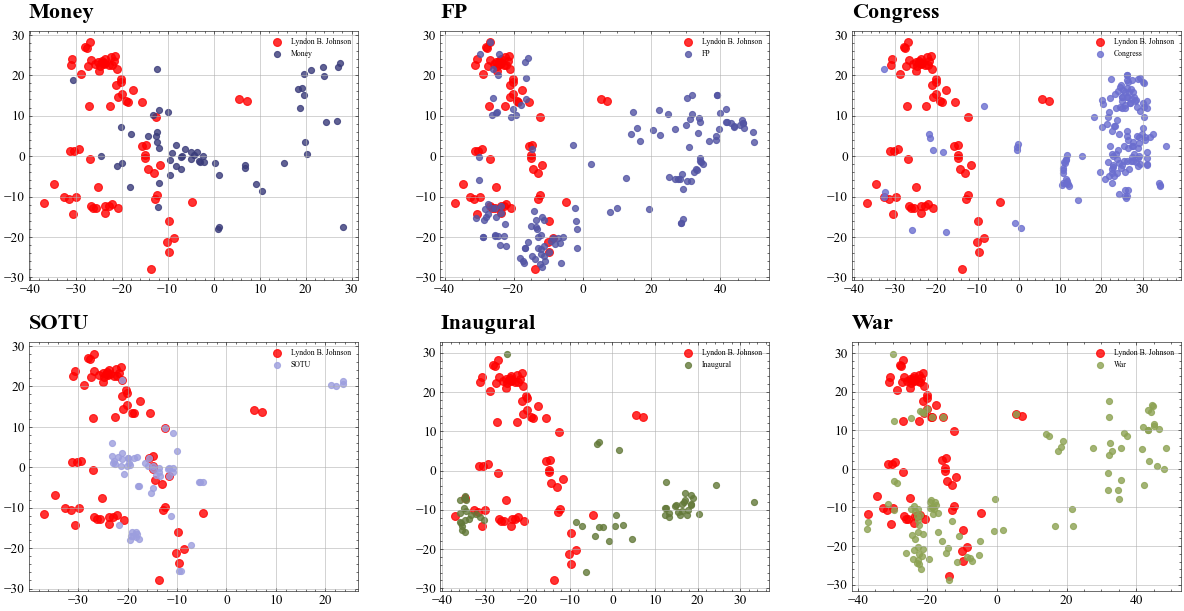

In [ ]:
# visualzie Lyndon B.Jonson
fig, axis = plt.subplots(2, 3, figsize=(16, 10), dpi=80)
# context_names = context_names[1:]
cmap = cm.get_cmap('tab20b')
colors = cmap.colors
i = 0
president = 'Lyndon B. Johnson'
for context_name in context_names:
    x_index = speech[speech.Context == context_name].index.values
    if len(x_index) <= 50:
        continue
    president_position = speech[speech.President == president].index.values
    axis[i//3, i%3].scatter(tsneDoc[president_position, 0], tsneDoc[president_position, 1], color='red', s=50, alpha=0.8, label=president)
    axis[i//3, i%3].set_title(context_name, loc = 'left', fontsize=20, pad=12, fontweight ="bold")
    axis[i//3, i%3].scatter(tsneDoc[x_index, 0], tsneDoc[x_index, 1], color=colors[i], s=30, alpha=0.8, label=context_name)
    axis[i//3, i%3].tick_params(axis='both', which='major', labelsize=12)
    axis[i//3, i%3].legend()
    axis[i//3, i%3].grid()
    i += 1
    if i == 9:
        break
        
plt.subplots_adjust(left=0, bottom=0.1, right=0.9, top=0.8, wspace=0.25, hspace=0.25)
plt.show()

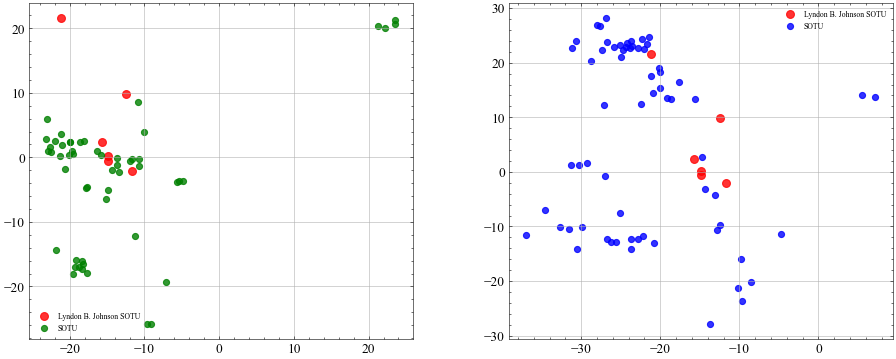

In [ ]:
# visualize Lyndon B.Jonson's SOTU speeches
fig, axis = plt.subplots(1, 2, figsize=(12, 6), dpi=80)
# context_names = context_names[1:]
cmap = cm.get_cmap('tab20b')
colors = cmap.colors

i = 0
president = 'Lyndon B. Johnson'
topic = 'SOTU'

x_index = speech[(speech.Context == topic) & (speech.President != president)].index.values
y_index = speech[(speech.President == president) & (speech.Context != topic)].index.values
president_position = speech[(speech.President == president) & (speech.Context == topic)].index.values
axis[0].scatter(tsneDoc[president_position, 0], tsneDoc[president_position, 1], color='red', s=50, alpha=0.8, label=president+' '+topic)
axis[0].scatter(tsneDoc[x_index, 0], tsneDoc[x_index, 1], color='green', s=30, alpha=0.8, label=topic)
axis[0].tick_params(axis='both', which='major', labelsize=12)
axis[0].legend()
axis[0].grid()
        
axis[1].scatter(tsneDoc[president_position, 0], tsneDoc[president_position, 1], color='red', s=50, alpha=0.8, label=president+' '+topic)
axis[1].scatter(tsneDoc[y_index, 0], tsneDoc[y_index, 1], color='blue', s=30, alpha=0.8, label=topic)
axis[1].tick_params(axis='both', which='major', labelsize=12)
axis[1].legend()
axis[1].grid()

plt.subplots_adjust(left=0, bottom=0.1, right=0.9, top=0.8, wspace=0.25, hspace=0.25)
plt.show()

The distance between clusters can be defined using Ward's method, which says that the distance between cluster A and B is how much the sum of squares will increase when we merge them. Mathmatically, this can be expressed as

$\Delta (A,B)=\sum_{i\in A\cup B} \| \vec{x}_{i} -\vec{m}_{A\cup B} \|^{2} -\sum_{i\in A} \| \vec{x}_{i} -\vec{m}_{A} \|^{2} -\sum_{i\in B} \| \vec{x}_{i} -\vec{m}_{B} \|^{2} =\frac{n_{A}n_{B}}{n_{A}+n_{B}} \| \vec{m}_{A} -\vec{m}_{B} \|^{2}  $

where $\vec{m}_{j}$ is the center of cluster of cluster $j$, and $n$ is the number of points in it. With this distance measurement, we will then be able to measure the distance between a president's speeches on a certain topic with the other presidents' speeches on that topic and the distance between a president's speeches on a certain topic with the other speeches of that president.


In [ ]:
# distance between a president's speeches on a certain topic and the other presidents' speeches on that topic
ward_dist(tsneDoc[x_index, :], tsneDoc[president_position, :]) 

318.34832663047985

In [ ]:
# distance between a president's speeches on a certain topic and the other speeches of that president
ward_dist(tsneDoc[y_index, :], tsneDoc[president_position, :])

144.89329812212463

In [ ]:
# distance between a president's speeches on a certain topic
ward_dist(tsneDoc[president_position, :], [])

461.618504384379

In [ ]:
congress_net

,Barack Obama,Woodrow Wilson,George W. Bush,Andrew Johnson,John F. Kennedy,Lyndon B. Johnson,Franklin D. Roosevelt,Ulysses S. Grant,Ronald Reagan,Bill Clinton
Name,,,,,,,,,,
Barack Obama,1.000000,0.478911,1.000000,0.000000,1.000000,0.695120,1.000000,0.018721,1.000000,0.926745
Woodrow Wilson,0.667214,1.000000,0.040568,0.265894,0.040568,0.659566,0.040568,0.000000,0.040568,0.490666
George W. Bush,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Andrew Johnson,0.228598,0.113282,0.681362,1.000000,0.681362,0.072683,0.681362,0.842615,0.681362,0.000000
John F. Kennedy,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Lyndon B. Johnson,0.766240,0.591285,1.000000,0.078302,1.000000,1.000000,1.000000,0.000000,1.000000,0.665820
Franklin D. Roosevelt,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Ulysses S. Grant,0.373319,0.000000,0.775920,0.869702,0.775920,0.167062,0.775920,1.000000,0.775920,0.188420
Ronald Reagan,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
my_position

array([[-2.4427674e-03, -1.0960482e-02,  5.2932795e-02, -5.3539798e-03,
        -5.5906097e-03, -1.0678484e-02, -5.5715996e-03, -1.8123016e-02,
        -8.1781866e-03, -1.1316627e-02,  2.7746565e-03,  7.4238534e-04,
        -6.0368562e-03,  4.3218029e-03, -2.9355331e-05,  1.1516876e-02,
        -9.7628133e-03, -8.0833435e-03, -6.1746426e-03,  8.9745678e-04,
         3.6618507e-03,  1.2538196e-03, -2.7719503e-03,  2.6515275e-03,
         6.8270002e-04, -9.0023922e-03, -1.1915851e-04,  5.1470269e-03,
        -2.7411287e-03,  7.7404402e-04,  9.7307689e-05, -3.4889150e-03,
        -2.9425062e-03,  4.0680999e-03, -1.0490245e-03,  2.4868018e-04,
        -2.3948328e-04, -1.7542765e-03, -1.0036197e-03,  3.9956492e-04,
        -1.9487899e-03,  2.4911014e-03, -2.8884751e-03,  3.8604753e-03,
         3.2650942e-03,  7.8887306e-04,  1.6947530e-03,  3.1902789e-04,
        -3.5512170e-03, -1.9111464e-03, -1.3030857e-03, -1.9868258e-03,
         1.9489366e-03,  1.8419300e-03,  3.4712520e-04, -1.63690